<a href="https://colab.research.google.com/github/Chaqmoqjon/Deep_Learning/blob/main/3_Transport_Image_Full_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch #2.5.1+cu124.  ~ 1.10.0+cu111.  #deep learning kutubxonasi
import fastai #2.7.18. ~2.5.3  #deep learning kutubxonasi
torch.cuda.is_available() #tekshirish

True

##Rasmlarni yuklash

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git #datani yuklab, csv qilish, classlarni joylash uchun

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 18.93 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt #kutubxonalar yuklandi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [ ]:
# !cd OIDv4_ToolKit && python main.py -h #help, main.py ning ichidagi funksiyalar

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0] [--image_IsGroupOf 1 or 0]
               [--image_IsDepiction 1 or 0] [--image_IsInside 1 or 0]
               [--multiclasses 0 (default) or 1] [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset folder
  -y, --yes

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200 #mana shularga yordam beradi


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 34970 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

##Rasmlarni tayyorlash

In [ ]:
from fastai.vision.all import * #fastai kutubxonasi
from ipywidgets import widgets

In [ ]:
path = Path('train')
# path.ls() #hamma data kategoriyalari
fls = get_image_files(path) #hamma rasmlarni ko'rish
failed = verify_images(fls) #rasmlarni tekshirish
failed

(#0) []

In [ ]:
#Block yaratamiz
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,  #rasmlar olindi
    splitter = RandomSplitter(valid_pct=0.2, seed=37), #rasmlarni test va train uchun bo'lindi
    get_y = parent_label, #avtomatik label berish.
    item_tfms=Resize(224) #training uchun rasmni bir xil o'lchamga olish
)

In [ ]:
#Data loader
dls = transports.dataloaders(path)

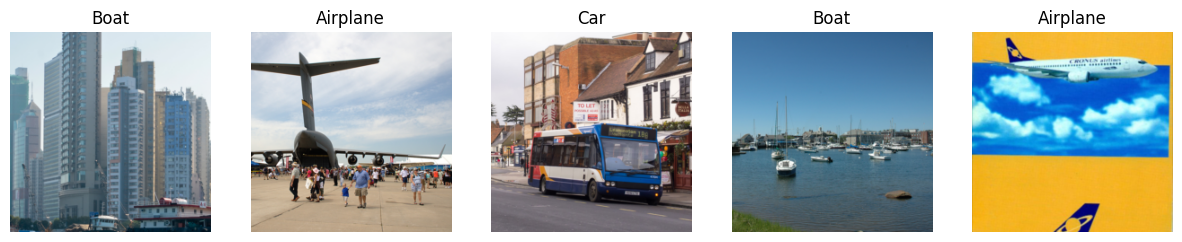

In [ ]:
dls.train.show_batch(max_n = 5, nrows = 1) #rasmlarni tekshirish

##Model Training

In [ ]:
#train model
learn = cnn_learner(dls, resnet34, metrics=accuracy) #data, model, test
learn.fine_tune(6) #dataning bir qismini berib o'qitish

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.572255,0.344827,0.875000,00:07


epoch,train_loss,valid_loss,accuracy,time
0,0.376338,0.236582,0.908333,00:09
1,0.265244,0.193349,0.908333,00:08
2,0.205928,0.157152,0.950000,00:09
3,0.153660,0.218687,0.933333,00:08
4,0.119839,0.230803,0.916667,00:09
5,0.096601,0.225052,0.916667,00:09


##Model Testing

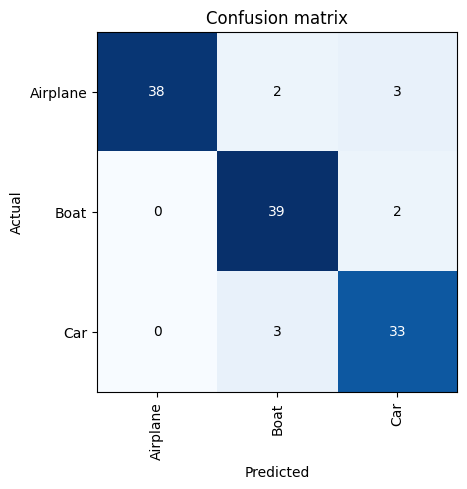

In [ ]:
#test
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

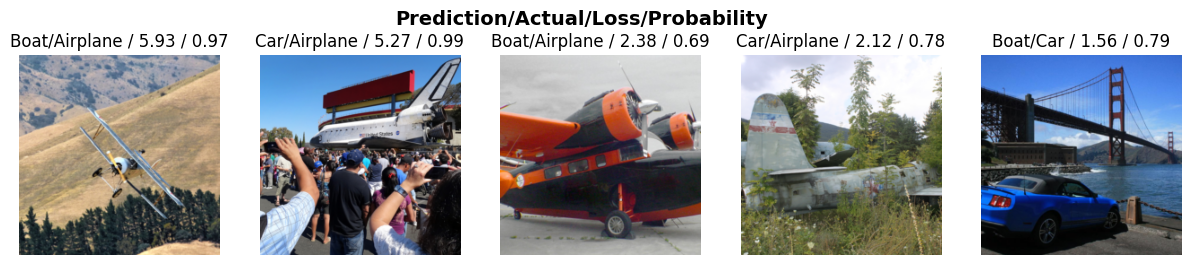

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#rasm yuklab tekshirish
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Car; Probability: 99.4%


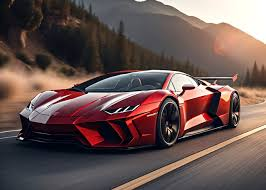

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_idx, prob = learn.predict(img)
print(f'Prediction: {pred}; Probability: {prob[pred_idx] * 100 :.01f}%')
img

##Export and Load

In [ ]:
learn.export('transport_model.pkl')

In [ ]:
model = load_learner('transport_model.pkl')

In [ ]:
model.predict(img)

('Car', tensor(2), tensor([5.6518e-03, 1.5512e-04, 9.9419e-01]))